<a href="https://colab.research.google.com/github/Kishan-Ved/MLDeepLab/blob/main/GenerativeAdversarialNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Adversarial Networks
The following code uses a GAN model to replicate images of digits in the MNIST dataset.

Number of epochs = 50

Time taken = 839 s (on colab's GPU) for the block with Epochs

## Necessary imports, hyperparameters and MNIST Dataset

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import numpy as np

torch.manual_seed(42)
np.random.seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # GPU or CPU

batch_size = 128
latent_size = 100
hidden_size = 256
num_epochs = 50
sample_dir = "samples"

os.makedirs(sample_dir, exist_ok=True) # make a directory

transform = transforms.Compose([ # MNIST dataset
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

mnist_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
data_loader = DataLoader(dataset=mnist_dataset, batch_size=batch_size, shuffle=True)

## Defining the Generator function

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(latent_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 784)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.tanh(self.fc2(x))
        return x

## Defining the discriminator function

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(784, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

## Calling the created functions and Optimisers (gradinet descent)

In [ ]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999)) # Optimisers or gradient descent
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

## Epochs and Loss Functions
The loss functions are:

For G:

E[log(1-D(G(z)))]

---

For D:

E[log(D(x))+log(1-D(G(z))]

In [ ]:
total_step = len(data_loader)
for epoch in range(num_epochs):
    print("Epoch:",(epoch+1))
    for i, (images, _) in enumerate(data_loader):
        batch_size = images.size(0)
        images = images.view(batch_size, -1).to(device) # images to tensor
        real_labels = torch.ones(batch_size, 1).to(device) # Generate ones
        fake_labels = torch.zeros(batch_size, 1).to(device) # Generate zeros

        discriminator.zero_grad() # Gradient of discriminator parameters are set to 0, to prepare for gradient descent

        outputs_real = discriminator(images) # Put real images into discriminator
        d_loss_real = torch.log(outputs_real).mean() # Find the mean loss

        z = torch.randn(batch_size, latent_size).to(device) # Generate random noise
        fake_images = generator(z) # transforms random noise passed into image like data
        outputs_fake = discriminator(fake_images.detach())
        d_loss_fake = (torch.log(1 - outputs_fake)+torch.log(outputs_real)).mean()

        d_loss = -(d_loss_real + d_loss_fake)  # Negate the loss for ascending gradient
        d_loss.backward()
        optimizer_D.step()

        generator.zero_grad()
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = generator(z)
        outputs_fake = discriminator(fake_images)
        g_loss = torch.log(1 - outputs_fake).mean()  # Descending gradient
        g_loss.backward()
        optimizer_G.step()

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50


## Showing the generated images

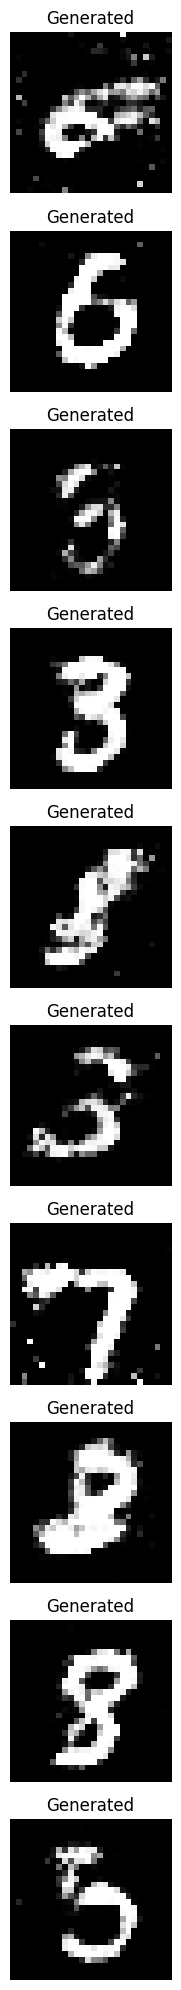

In [ ]:
import matplotlib.pyplot as plt

dataset = datasets.MNIST(root="data", train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

num_samples = 10
noise = torch.randn(num_samples, latent_size).to(device)
generated_images = generator(noise).detach().cpu()
generated_images = generated_images.view(-1, 1, 28, 28)  # Reshape the generated images

fig, axes = plt.subplots(num_samples, figsize=(10, 2 * num_samples))
for i in range(num_samples):
    # axes[i, 0].imshow(dataset[i][0].squeeze(), cmap='gray')
    # axes[i, 0].axis('off')
    # axes[i, 0].set_title('Original')

    axes[i].imshow(generated_images[i][0], cmap='gray')  # Access the image tensor directly
    axes[i].axis('off')
    axes[i].set_title('Generated')

plt.tight_layout()
plt.show()

In [ ]:
print(d_loss)
print(g_loss)

tensor(1.5891, device='cuda:0', grad_fn=<NegBackward0>)
tensor(-1.2070, device='cuda:0', grad_fn=<MeanBackward0>)
